# **EDA - Global Temperatures:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_temp = pd.read_csv('D:\Documentos\Andrés\Proyectos Ciencia de Datos y ML\Python\GlobalLandTemperaturesByCountry\Data\GlobalLandTemperaturesByCountry.csv')
df_temp.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


*1- Composición de los datos:*

In [3]:
df_temp.shape

(577462, 4)

In [4]:
df_temp.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
df_temp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [7]:
df_temp['Country'].value_counts()

Hungary                                3239
Isle Of Man                            3239
Serbia                                 3239
Belgium                                3239
Austria                                3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
French Southern And Antarctic Lands     788
Heard Island And Mcdonald Islands       788
Antarctica                              764
Name: Country, Length: 243, dtype: int64

In [8]:
# Total de datos faltantes en dataset
df_temp.apply(lambda x: x.isna().value_counts())

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
False,577462.0,544811,545550,577462.0
True,NaN,32651,31912,NaN


In [9]:
# Se crea una variable nueva igual a dt, pero con formato datetime
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [10]:
# Nuevo dataset con info menor a 1970
idx = df_temp['year'] < pd.to_datetime('1970-01-01') 
df_nan = df_temp[idx]                                    
df_nan

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384,2.294,Åland,1743-11-01
1,1743-12-01,NaN,NaN,Åland,1743-12-01
2,1744-01-01,NaN,NaN,Åland,1744-01-01
3,1744-02-01,NaN,NaN,Åland,1744-02-01
4,1744-03-01,NaN,NaN,Åland,1744-03-01
...,...,...,...,...,...
576932,1969-08-01,18.531,0.245,Zimbabwe,1969-08-01
576933,1969-09-01,21.565,0.224,Zimbabwe,1969-09-01
576934,1969-10-01,24.282,0.192,Zimbabwe,1969-10-01
576935,1969-11-01,24.661,0.195,Zimbabwe,1969-11-01


In [11]:
# Revisión de faltantes filtrando antes de 1970
df_nan.apply(lambda x: x.isna().value_counts())

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
False,449887.0,417982,418197,449887.0,449887.0
True,NaN,31905,31690,NaN,NaN


*2- Explorando los datos:*

In [12]:
# Se usaran los datos mayores a 1970, puesto que como se validó, más del 90% de datos faltantes están antes de esta fecha
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]                                    
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [13]:
# Se análiza la información de la temperatura agrupada por pais y año, y sus respectivas medias y medianas.
df_temp_avg = df_temp.groupby(['Country',
                 pd.Grouper(key='year', freq='1Y')]).agg({'AverageTemperature':[np.mean,np.median]})
df_temp_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

<AxesSubplot:xlabel='year'>

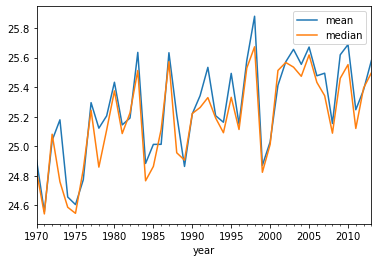

In [14]:
# Comportamiento de la temperatura (media y mediana) en Colombia
df_temp_avg.xs('Colombia')['AverageTemperature'].plot()

In [15]:
# Se resetean los indices para que quede en orden la tabla y se escoge una sóla variable
df_temp_med = df_temp_avg['AverageTemperature'][['median']].reset_index()   
df_temp_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [16]:
# Se crea una nueva columna 'year' extrayendo el año de la fecha
df_temp_med['date'] = df_temp_med['year'].dt.year      
df_temp_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [17]:
# Se renombran algunas columnas existentes
df_temp_med.rename(columns={'median':'temperature'}, inplace=True)      
df_temp_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [18]:
# Filtros para gráficar más paises
Colombia = df_temp_med[df_temp_med['Country'] == 'Colombia']
Usa = df_temp_med[df_temp_med['Country'] == 'United States']
China = df_temp_med[df_temp_med['Country'] == 'China']
Japan = df_temp_med[df_temp_med['Country'] == 'Japan']
Spain = df_temp_med[df_temp_med['Country'] == 'Spain']
Mexico = df_temp_med[df_temp_med['Country'] == 'Mexico']

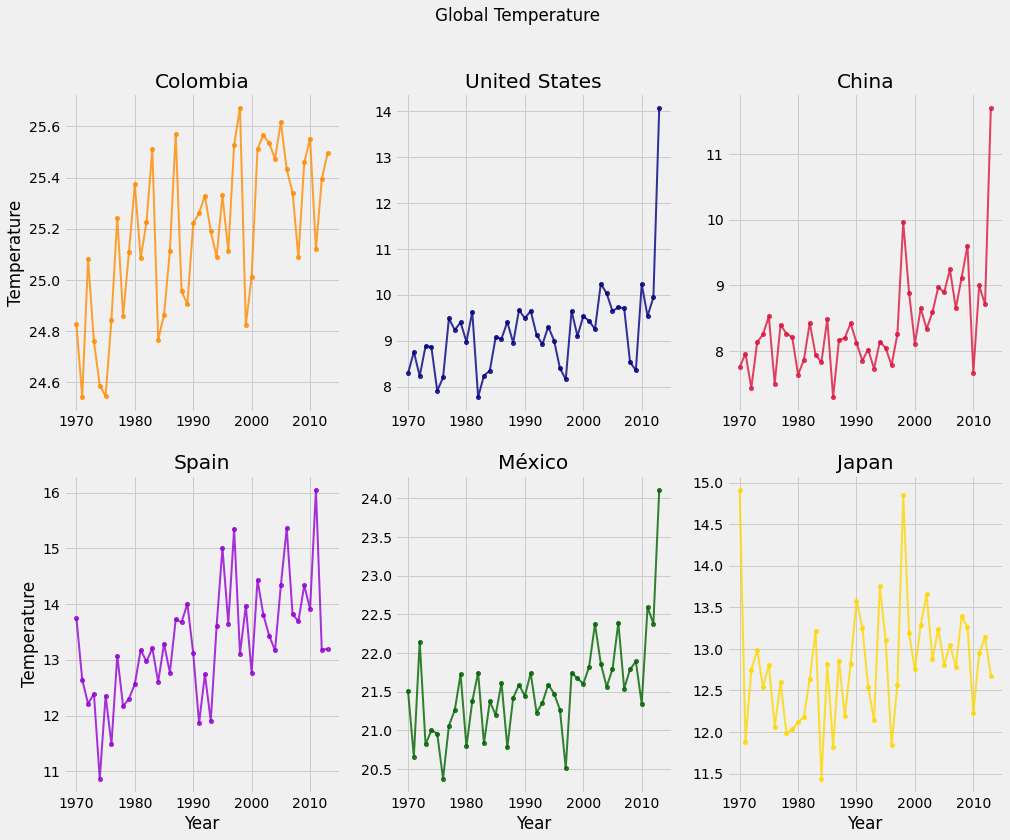

In [19]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,12)

ax[0,0].plot(Colombia['date'], Colombia['temperature'],
             color = 'darkorange', marker = 'o', markersize = 4, alpha = 0.8, linewidth = 2)
ax[0,0].set_ylabel('Temperature')
ax[0,0].set_title('Colombia')


ax[0,1].plot(Usa['date'], Usa['temperature'],
             color = 'navy', marker = 'o', markersize = 4, alpha = 0.8, linewidth = 2)
ax[0,1].set_title('United States')

ax[0,2].plot(China['date'], China['temperature'],
             color = 'crimson', marker = 'o', markersize = 4, alpha = 0.8, linewidth = 2)
ax[0,2].set_title('China')

ax[1,0].plot(Spain['date'], Spain['temperature'],
             color = 'darkviolet', marker = 'o', markersize = 4, alpha = 0.8, linewidth = 2)
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Temperature')
ax[1,0].set_title('Spain')

ax[1,1].plot(Mexico['date'], Mexico['temperature'],
             color = 'darkgreen', marker = 'o', markersize = 4, alpha = 0.8, linewidth = 2)
ax[1,1].set_xlabel('Year')
ax[1,1].set_title('México')

ax[1,2].plot(Japan['date'], Japan['temperature'],
             color = 'gold', marker = 'o', markersize = 4, alpha = 0.8, linewidth = 2)
ax[1,2].set_xlabel('Year')
ax[1,2].set_title('Japan')

fig.suptitle('Global Temperature')

plt.show()

In [20]:
# Se crea un DF filtrado por determinados paises y variables, para analizar sus variaciones en temperatura con un boxplot
countr_espec = df_temp_med[df_temp_med['Country'].isin(['Colombia', 'Argentina', 'Brazil', 'United States', 'Canada', 'China', 'Japan', 'Mexico', 'Germany', 'France', 'Spain'])]
cols = ['Country', 'temperature']
countr_espec = countr_espec.loc[:, cols]
countr_espec.head()

,Country,temperature
440,Argentina,15.1150
441,Argentina,14.7665
442,Argentina,14.3445
443,Argentina,14.8675
444,Argentina,15.2160


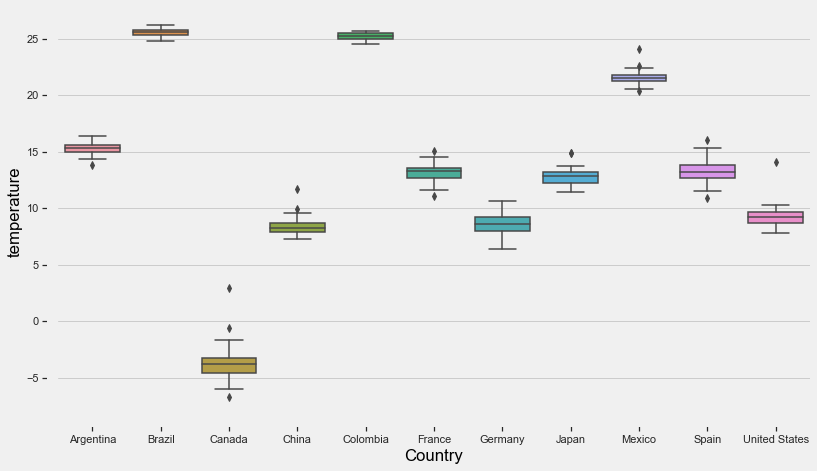

In [21]:
# Variaciones de algunos paises
fig, ax = plt.subplots()
fig.set_size_inches(12,7)

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x = 'Country', y = 'temperature', data = countr_espec)
sns.despine(offset=10, trim=True)

*3- Uniendo todos los datasets:*

In [22]:
 # Se leen todos los Datasets y se  guardan en variables distintas
df_agri = pd.read_csv('D:\Documentos\Andrés\Proyectos Ciencia de Datos y ML\Python\GlobalLandTemperaturesByCountry\Data\Climate Change_WorldBank\API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv',header=2)         
df_fore = pd.read_csv('D:\Documentos\Andrés\Proyectos Ciencia de Datos y ML\Python\GlobalLandTemperaturesByCountry\Data\Climate Change_WorldBank\API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv',header=2)                                 
df_elec = pd.read_csv('D:\Documentos\Andrés\Proyectos Ciencia de Datos y ML\Python\GlobalLandTemperaturesByCountry\Data\Climate Change_WorldBank\API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv',header=2)
df_co2e = pd.read_csv('D:\Documentos\Andrés\Proyectos Ciencia de Datos y ML\Python\GlobalLandTemperaturesByCountry\Data\Climate Change_WorldBank\API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv',header=2)
df_popu = pd.read_csv('D:\Documentos\Andrés\Proyectos Ciencia de Datos y ML\Python\GlobalLandTemperaturesByCountry\Data\Climate Change_WorldBank\API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv',header=2)

In [23]:
df_agri.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,20.0,20.0,20.0,20.0,20.0,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,377000.0,377600.0,378100.0,378730.0,378750.0,...,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000,NaN,NaN,NaN,NaN
2,Angola,AGO,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,571700.0,572000.0,572200.0,572500.0,572700.0,...,589900.000000,589900.000000,591900.000000,591900.000000,591900.000000,591900.000000,NaN,NaN,NaN,NaN
3,Albania,ALB,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,12320.0,12320.0,12330.0,12300.0,12370.0,...,12010.000000,12013.000488,11873.000488,11742.900391,11743.000488,11816.999512,NaN,NaN,NaN,NaN
4,Andorra,AND,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,260.0,260.0,260.0,260.0,260.0,...,197.700005,187.600002,188.099995,188.099995,188.099995,187.800007,NaN,NaN,NaN,NaN


In [24]:
# Datos faltantes en el dataset de agricultura
df_agri.apply(lambda x: x.isna().value_counts())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
False,264.0,264.0,264.0,264.0,NaN,223,223,223,223,223,...,256,256,256,256,256,256,NaN,NaN,NaN,NaN
True,NaN,NaN,NaN,NaN,264.0,41,41,41,41,41,...,8,8,8,8,8,8,264.0,264.0,264.0,264.0


In [25]:
# Datos faltantes en el dataset de electricidad
df_elec.apply(lambda x: x.isna().value_counts())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
False,264.0,264.0,264.0,264.0,32,32,32,32,32,33,...,183,183,183,183,1,1,1,1,NaN,NaN
True,NaN,NaN,NaN,NaN,232,232,232,232,232,231,...,81,81,81,81,263,263,263,263,264.0,264.0


In [26]:
# Se seleccionan las columnas que queremo usar en datasets, por lo visto con los nulos es mejor usar desde 1970 al 2015
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [27]:
# Se crea una función que modifique el formato, y que funcione para todos los datasets
def fun_format(df, col):
  return df.loc[:,cols].melt(id_vars = ['Country Name','Country Code']).rename(
      columns = {'variable':'date',
                 'Country Name':'Country',
                 'Country Code':'name',
                 'value':col})

In [28]:
# Se aplica la función creada a todos los DF
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


In [29]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  object 
 3   population  11501 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


In [30]:
# Se cambia el tipo de la columna 'date' que quedó como texto a númerica, para poder realizar el merge entre todas los datasets
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)

In [31]:
# Para los join entre tablas, usaremos la tabla de temperaturas mundiales que teniamos
df_temp_med.head()

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974


In [32]:
# Se realiza un merge entre el DF de las temperaturas mundiales, con el de la popablación por país
df_merge = pd.merge(df_temp_med[['Country','temperature','date']],
                    df_popu, on = ['Country','date'], how = 'inner')
df_merge.head()

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475445.0
1,Afghanistan,13.8725,1972,AFG,11791215.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412950.0
4,Afghanistan,13.5130,1975,AFG,12689160.0


In [33]:
# Se crea una función para los join de todas las tablas
def fun_merge(df1,df2):
    return pd.merge(df1,df2,on=['Country','name','date'], how = 'inner')

df_merge = fun_merge(df_merge,df_agri)                
df_merge = fun_merge(df_merge,df_elec)
df_merge = fun_merge(df_merge,df_co2e)
df_merge = fun_merge(df_merge,df_fore)
df_merge

,Country,temperature,date,name,population,agriculture,electricprod,co2,forest
0,Afghanistan,14.9340,1971,AFG,11475445.0,380360.0,NaN,1895.839,NaN
1,Afghanistan,13.8725,1972,AFG,11791215.0,380460.0,NaN,1532.806,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,380480.0,NaN,1639.149,NaN
3,Afghanistan,13.6160,1974,AFG,12412950.0,380480.0,NaN,1917.841,NaN
4,Afghanistan,13.5130,1975,AFG,12689160.0,380480.0,NaN,2126.860,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,163000.0,585.456912,5603.176,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,162000.0,606.644199,7777.707,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,164000.0,636.249337,9563.536,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,162000.0,608.762505,7792.375,149992.001953


In [34]:
# Datos faltantes en el dataset merge
df_merge.apply(lambda x: x.isna().value_counts())

,Country,temperature,date,name,population,agriculture,electricprod,co2,forest
False,7224.0,7224.0,7224.0,7224.0,7200,6592,4670,6408,3984
True,NaN,NaN,NaN,NaN,24,632,2554,816,3240


**Nota: Si no se quisieran borrar todas las filas que tienen datos faltantes. Se puede usar 'fillna()' e 'interpolate()', para reemplazar la mayoria de esos valores por valores interpolados y más acertados a la realidad*

In [35]:
df_p1 = df_merge.fillna(df_merge.interpolate())

In [36]:
# Numero de datos faltantes por variables, despúes de interpolar
df_p1.apply(lambda x: x.isna().value_counts())

,Country,temperature,date,name,population,agriculture,electricprod,co2,forest
False,7224.0,7224.0,7224.0,7224.0,7224.0,7224.0,7181,7224.0,7205
True,NaN,NaN,NaN,NaN,NaN,NaN,43,NaN,19


In [37]:
# Se eliminaran las filas con faltantes, para obtener el dataset completo y condensado debido a que en una de las variables le falta el 45% y en otra el 35% de la información. Reemplazar valores en este caso sería modificar demasiado el dataset
df_final_climate = df_merge.dropna()
df_final_climate

,Country,temperature,date,name,population,agriculture,electricprod,co2,forest
62,Albania,13.4490,1990,ALB,3286542.0,11210.0,552.252185,5515.168,7887.999878
63,Albania,11.5885,1991,ALB,3266790.0,11270.0,418.453589,4286.723,7868.499756
64,Albania,13.5850,1992,ALB,3247039.0,11270.0,453.644074,2515.562,7849.000244
65,Albania,13.6500,1993,ALB,3227287.0,11260.0,536.363825,2335.879,7829.500122
66,Albania,13.2390,1994,ALB,3207536.0,11260.0,596.407959,1925.175,7810.000000
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,163000.0,585.456912,5603.176,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,162000.0,606.644199,7777.707,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,164000.0,636.249337,9563.536,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,162000.0,608.762505,7792.375,149992.001953


*3- Análisis de datos compactados:*

In [38]:
# Se agrupa el dataset por país para ver los que más producen CO2, usando la madia en orden descendente
top_10 = df_final_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(11).index 
top_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico', 'South Africa'],
      dtype='object', name='Country')

In [39]:
# Se le quita la notación cientifica de los números
pd.set_option('display.float_format', '{:,.1f}'.format)

In [40]:
# Se crea un nuevo DF usando la lista de paises anterior como filtro
df_max_co2 = df_final_climate[df_final_climate['Country'].isin([ 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico', 'South Africa'])]
df_max_co2

,Country,temperature,date,name,population,agriculture,electricprod,co2,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","677,680.0","16,167.4","435,181.2","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","677,530.0","16,181.6","426,780.1","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","678,140.0","16,164.4","440,978.8","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","678,740.0","16,320.1","445,580.8","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","679,340.0","16,388.3","456,849.5","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","4,099,606.9","12,913.7","5,263,505.5","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","4,084,261.9","13,394.9","5,395,532.1","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","4,046,693.1","13,246.0","5,289,680.5","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","4,087,065.0","12,964.3","5,119,436.4","3,092,700.0"


<AxesSubplot:xlabel='population', ylabel='co2'>

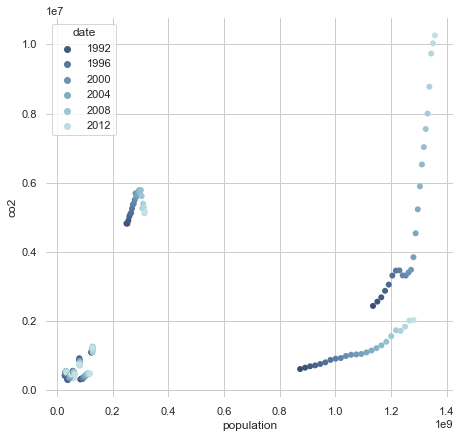

In [41]:
# Se contrastaran los valores entre población y CO2 para este top 10
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="population", y="co2",
                hue="date",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df_max_co2, ax=ax)

<AxesSubplot:xlabel='temperature', ylabel='co2'>

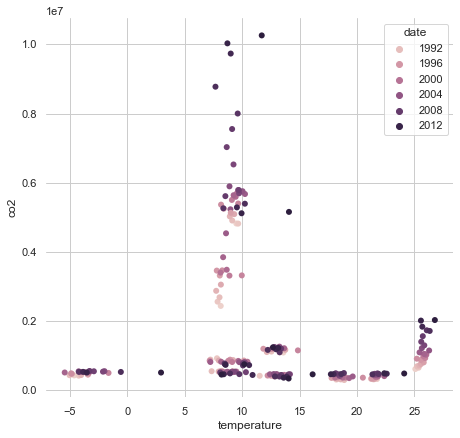

In [42]:
# Ahora se quiere ver si se relaciona la producción del CO2 y el aumento de la temperatura
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="temperature", y="co2",
                hue="date",
                sizes=(1, 8), linewidth=0,
                data=df_max_co2, ax=ax)

In [43]:
# Se calcula y se gráfica la correlación entre las variables del DF
df_final_corr = df_final_climate.corr()

<AxesSubplot:>

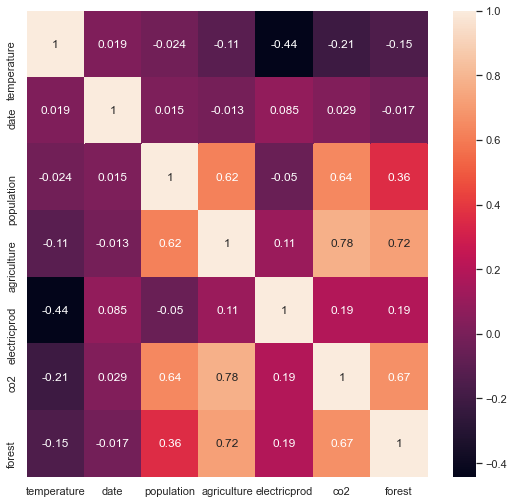

In [44]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_final_corr, annot=True)

In [45]:
# Teniendo en cuenta el en df original aparece la variable date, se crea una agrupación por año y con las medias por país x variable, para que no entre en el heatmap
df_mean = df_final_climate.groupby('date').mean()
df_mean

,temperature,population,agriculture,electricprod,co2,forest
date,,,,,,
1990,19.0,"49,686,612.7","430,995.9","3,250.5","220,684.0","361,185.8"
1991,18.6,"50,302,054.4","428,664.9","3,235.3","229,146.3","355,102.3"
1992,16.8,"45,787,439.1","406,869.0","3,286.5","215,358.8","312,578.8"
1993,17.2,"46,213,551.8","402,774.6","3,299.9","216,368.2","308,025.1"
1994,17.6,"46,497,269.8","401,503.5","3,300.2","217,562.4","304,940.8"
1995,17.7,"46,441,162.5","395,188.0","3,405.3","218,453.7","300,181.5"
1996,17.4,"47,096,951.0","395,617.0","3,473.6","224,770.5","299,723.0"
1997,17.3,"47,752,132.0","396,958.3","3,542.2","226,948.3","299,264.5"
1998,18.1,"48,398,704.8","398,075.1","3,665.5","226,206.8","298,806.0"


<AxesSubplot:>

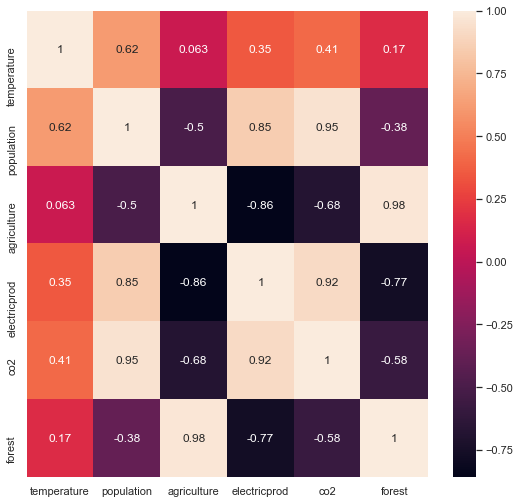

In [46]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_mean.corr(),annot=True)

4- *Gráficas individuales de las variables con mayor correlación - En el transcurso de los años:*

<AxesSubplot:xlabel='electricprod', ylabel='co2'>

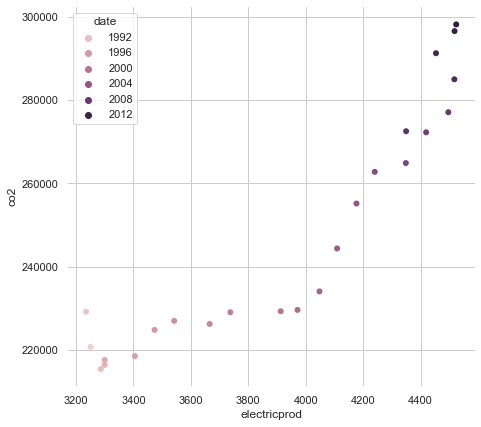

In [47]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="electricprod", y="co2",
                hue="date",
                sizes=(1, 8), linewidth=0,
                data=df_mean, ax=ax)

<AxesSubplot:xlabel='agriculture', ylabel='forest'>

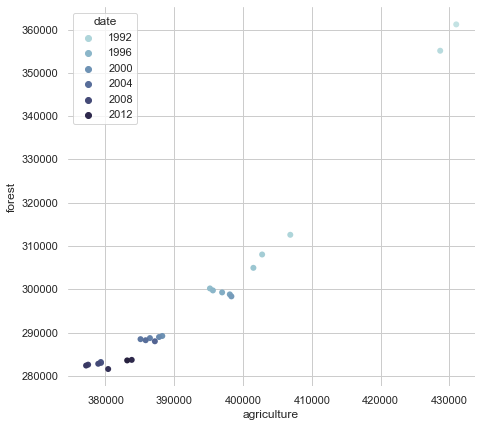

In [48]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="agriculture", y="forest",
                hue="date", palette = 'ch:start=.2,rot=-.3',
                sizes=(1, 8), linewidth=0,
                data=df_mean, ax=ax)

<AxesSubplot:xlabel='population', ylabel='co2'>

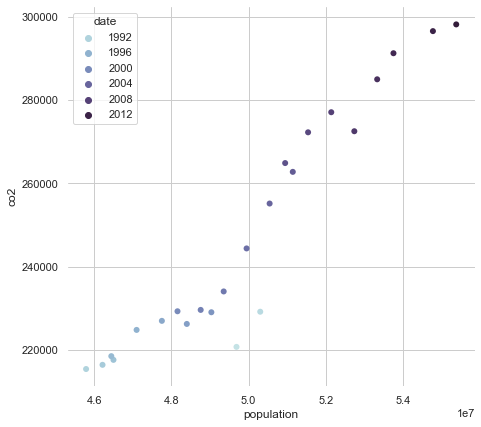

In [49]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="population", y="co2",
                hue="date", palette = 'ch:start=.5,rot=-.4',
                sizes=(1, 8), linewidth=0,
                data=df_mean, ax=ax)

<AxesSubplot:xlabel='population', ylabel='electricprod'>

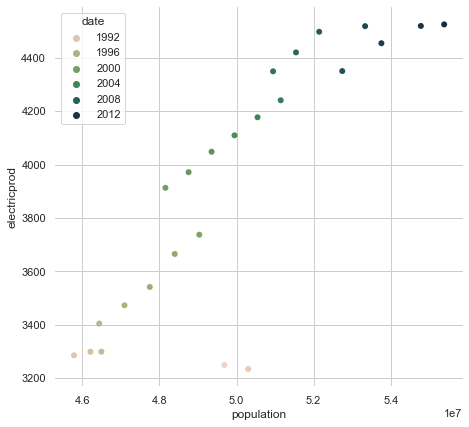

In [50]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="population", y="electricprod",
                hue="date", palette = 'ch:start=.1,rot=-.8',
                sizes=(1, 8), linewidth=0,
                data=df_mean, ax=ax)